In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from heterogeneity_analysis import Grouping

In [2]:
# # import pandas as pd
# # import numpy as np

# import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick


# class Resource:
#     def __init__(self, id: str, weights: list, grades: list):
#         self.id = id
#         data = {
#             "weight": weights,
#             "grade": grades
#         }
#         sorted_info = self.sort_info(pd.DataFrame(data))
        
#         self.info = self.calculate_metadata(sorted_info)
#         self.calculate_heterogeneity()
       
#     def sort_info(self, data: pd.DataFrame):
#         data.sort_values(by='grade', ascending=False, inplace=True)
#         data.reset_index(drop=True,inplace=True)
        
#         return data
         
#     def calculate_metadata(self, sorted_info):
#         df = sorted_info
#         df['cml_weight'] = df['weight'].cumsum()
    
#         sum_weights = sum(df['weight'])
#         df['weight_pct'] = np.divide(df['weight'], sum_weights)
#         df['cml_weight_pct'] = df['weight_pct'].cumsum()
#         df['yield'] = np.multiply(df['weight'], df['grade'])
#         df['cml_yield'] = df['yield'].cumsum()
#         df['cml_grade'] = np.divide(df['cml_yield'], df['cml_weight'])
        
#         sum_yield = sum(df['yield'])
#         df['recovery'] = np.divide(df['yield'], sum_yield)
#         df['cml_recovery'] = df['recovery'].cumsum()
        
#         return df
    
#     def calculate_heterogeneity(self):
#         df = self.info
        
#         b = df['weight']
#         c = df['cml_grade'].iloc[-1]
#         d = sum(df['weight'])
#         a = np.subtract(df['grade'], c)
        
#         num, den = np.multiply(a, b), np.multiply(c, d)
#         df['dist_het'] = np.power(np.divide(num, den), 2)  # (num/den)^2
#         self.cons_het = len(df) * sum(df['dist_het'])
        
#     def plot_grade_recovery_curve(self, ax: plt.Figure):
#         s = 3
        
#         df = self.info
#         ax_sec = ax.twinx()

#         x = df['cml_weight_pct']
#         ax.set_xlabel("Cumulative Mass %")
#         ax.set_xlim(0, 1)
#         ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
#         ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

#         y = df['cml_grade']
#         # ax.set_ylim(0, y.quantile(q=0.99))
#         ax.set_ylabel(f"Cumulative {self.id} Grade", c="blue")

#         ax.plot(x, y, color='blue', alpha=0.2, ls='--')
#         ax.scatter(x, y, color='blue', s=s)


#         y = df['cml_recovery']
#         ax_sec.set_ylabel(f"Cumulative {self.id} Recovery", c="red") 
#         ax_sec.set_ylim(0, 1)
#         ax_sec.set_yticks([0, 0.25, 0.5, 0.75, 1])
#         ax_sec.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

#         ax_sec.plot([0, 1], [0, 1], color='grey', alpha=0.2, ls='-.')

#         ax_sec.plot(x, y, color='red', alpha=0.2, ls='--')
#         ax_sec.scatter(x, y, color='red', s=s)

#         y_prime = np.subtract(y, x)
#         x_star = np.argmax(y_prime)
#         ax_sec.plot(x, y_prime, color='red', alpha=0.2, ls=':')

#         x_rec, y_rec = x[x_star], y[x_star]
#         ax_sec.plot([x_rec, 1], [y_rec, y_rec], c="black", ls=':', alpha=0.35)
#         ax_sec.annotate(f"{y_rec * 100:.3}%", (1, y_rec), xytext=(-35, -15), textcoords='offset points')
        
#         y_grade = df['cml_grade'][x_star]
#         ax.plot([0, x_rec], [y_grade, y_grade], c="black", ls=':', alpha=0.35)
#         ax.annotate(f"{y_grade:.3}", (0, y_grade), xytext=(5, 10), textcoords='offset points')
        
#         ax.plot([x_rec, x_rec], [min(df['cml_grade']), y_grade], c="black", ls=':', alpha=0.35)
#         ax_sec.plot([x_rec, x_rec], [0, y_rec], c="black", ls=':', alpha=0.35)
#         ax_sec.annotate(f"{x_rec * 100:.3}%", (x_rec, 0), xytext=(5, 10), textcoords='offset points', rotation=90)



# class Grouping:
#     def __init__(self, id):
#         self.id = id
#         self.resources = {}
        
#     def calculate_resource_heterogeneity(self, resource_id: str, weights: list, grades: list):
#         if len(weights) - len(grades) == 0:
#             self.resources[resource_id] = Resource(resource_id, weights, grades)
#         else:
#             raise Exception("Weight and grade arrays must be same length")
        
#     def plot_grade_recovery_curves(self):
#         fig, axs = plt.subplots(len(self.resources), figsize=(8, (6 * len(self.resources))))
        
#         # TODO: Fix this to better handle one or more resources
#         if len(self.resources) == 1:
#             axs.set_title(f'ID: {self.id}')
            
#             for i, resource_id in enumerate(self.resources.keys()):
#                 self.resources[resource_id].plot_grade_recovery_curve(axs)
#         else:
#             axs[0].set_title(f'ID: {self.id}')

#             for i, resource_id in enumerate(self.resources.keys()):
#                 self.resources[resource_id].plot_grade_recovery_curve(axs[i])

#         return fig


In [3]:
DATA_FOLDER = 'data/'
assay = pd.read_csv(f'{DATA_FOLDER}BS_assay.csv')
block_model = pd.read_csv(f'{DATA_FOLDER}BS_block_model.csv')
collar = pd.read_csv(f'{DATA_FOLDER}BS_collar.csv')
old_lith = pd.read_csv(f'{DATA_FOLDER}BS_old_lith.csv')
relog_geo = pd.read_csv(f'{DATA_FOLDER}BS_relog_geology.csv')
survey = pd.read_csv(f'{DATA_FOLDER}BS_survey.csv')

In [4]:
df = block_model.describe().transpose()
df['range'] = df['max'] - df['min']

df.transpose().round(2)

,X,Y,Z,AU,CU,AG,MO,NSR
count,404919.00,404919.00,404919.00,404919.00,404919.00,404919.00,404919.00,404919.00
mean,371899.93,6281813.24,355.43,0.22,0.07,1.69,0.00,10.86
std,283.14,257.23,201.77,0.13,0.06,0.98,0.00,7.12
min,371303.78,6281245.80,-115.00,0.00,0.00,0.01,0.00,1.00
25%,371670.60,6281619.86,195.00,0.12,0.02,1.06,0.00,5.90
50%,371889.10,6281804.31,335.00,0.19,0.06,1.50,0.00,8.52
75%,372126.41,6281995.29,505.00,0.29,0.10,2.07,0.01,13.98
max,372631.90,6282581.87,875.00,1.27,0.42,17.56,0.04,52.10
range,1328.13,1336.07,990.00,1.27,0.41,17.55,0.04,51.10


In [5]:
assay.describe()

,SAMPFROM,SAMPTO,AG_PPM_OLDISKUT,AS_PPM_OLDISKUT,BA_PPM_OLDISKUT,BI_PPM_OLDISKUT,CD_PPM_OLDISKUT,CO_PPM_OLDISKUT,CR_PPM_OLDISKUT,CU_PCT_OLDISKUT,FE_PCT_OLDISKUT,K_PCT_OLDISKUT,MO_PCT_OLDISKUT,NA_PCT_OLDISKUT,PB_PCT_OLDISKUT,S_PCT_OLDISKUT,SB_PPM_OLDISKUT,Veins
count,10525.000000,10525.000000,10328.00000,4038.000000,2820.000000,4038.000000,4038.000000,4038.000000,4038.000000,10306.000000,4038.000000,4038.000000,9034.000000,4038.000000,5234.000000,3571.000000,2820.000000,0.0
mean,155.971971,158.256211,10.56126,307.575656,495.053191,10.895740,23.471867,21.661961,65.699356,0.089409,6.098801,1.798683,0.003078,0.521446,0.064750,2.461747,5.392021,NaN
std,124.255053,124.278642,533.71958,1660.363993,503.072345,47.347628,78.863799,40.512976,67.533895,0.269481,3.428176,1.114614,0.095341,1.017273,0.266732,2.673068,9.010614,NaN
min,0.000000,0.460000,-9.00000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,NaN
25%,59.660000,61.900000,0.70000,31.000000,112.000000,1.000000,0.600000,10.000000,21.000000,0.012000,3.980000,0.950000,0.000000,0.020000,0.000000,0.870000,2.500000,NaN
50%,124.600000,126.760000,1.50000,52.000000,217.500000,2.500000,4.000000,15.000000,42.000000,0.034000,5.260000,1.520000,0.001000,0.030000,0.000000,1.640000,2.500000,NaN
75%,222.000000,224.300000,3.43000,130.750000,850.000000,6.000000,14.475000,21.000000,84.000000,0.104000,7.300000,2.460000,0.004000,0.190000,0.000000,3.035000,5.000000,NaN
max,693.000000,696.000000,54196.00000,58800.000000,3720.000000,1516.000000,2000.000000,1070.000000,622.000000,16.300000,50.000000,6.430000,0.400000,4.580000,4.500000,36.700000,171.000000,NaN


In [6]:
len(assay.HOLEID.unique())

194

In [7]:
print(len(assay), len(block_model), len(collar), len(old_lith), len(relog_geo), len(survey))

10527 404919 234 40845 221 937


In [8]:
assay.head(1)

,HOLEID,SAMPFROM,SAMPTO,AG_PPM_OLDISKUT,AS_PPM_OLDISKUT,AU_PPM_OLDISKUT,BA_PPM_OLDISKUT,BI_PPM_OLDISKUT,CD_PPM_OLDISKUT,CO_PPM_OLDISKUT,...,K_PCT_OLDISKUT,MO_PCT_OLDISKUT,NA_PCT_OLDISKUT,PB_PCT_OLDISKUT,S_PCT_OLDISKUT,SB_PPM_OLDISKUT,Comment,Veins,Snip_Veins,Snip_veins_sorted
0,1198,3.0,8.0,2.6,NaN,0.375,NaN,NaN,NaN,NaN,...,NaN,0.006,NaN,NaN,NaN,NaN,NaN,NaN,High,High


In [9]:
print(assay.isna().any())

HOLEID               False
SAMPFROM              True
SAMPTO                True
AG_PPM_OLDISKUT       True
AS_PPM_OLDISKUT       True
AU_PPM_OLDISKUT      False
BA_PPM_OLDISKUT       True
BI_PPM_OLDISKUT       True
CD_PPM_OLDISKUT       True
CO_PPM_OLDISKUT       True
CR_PPM_OLDISKUT       True
CU_PCT_OLDISKUT       True
FE_PCT_OLDISKUT       True
K_PCT_OLDISKUT        True
MO_PCT_OLDISKUT       True
NA_PCT_OLDISKUT       True
PB_PCT_OLDISKUT       True
S_PCT_OLDISKUT        True
SB_PPM_OLDISKUT       True
Comment               True
Veins                 True
Snip_Veins            True
Snip_veins_sorted     True
dtype: bool


In [10]:
assay[assay.SAMPFROM.isna()]

,HOLEID,SAMPFROM,SAMPTO,AG_PPM_OLDISKUT,AS_PPM_OLDISKUT,AU_PPM_OLDISKUT,BA_PPM_OLDISKUT,BI_PPM_OLDISKUT,CD_PPM_OLDISKUT,CO_PPM_OLDISKUT,...,K_PCT_OLDISKUT,MO_PCT_OLDISKUT,NA_PCT_OLDISKUT,PB_PCT_OLDISKUT,S_PCT_OLDISKUT,SB_PPM_OLDISKUT,Comment,Veins,Snip_Veins,Snip_veins_sorted
10500,UG21-212,NaN,NaN,NaN,NaN,NSA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Aug 2021 drilling,NaN,NaN,NaN
10526,UG21-217,NaN,NaN,NaN,NaN,NSA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Aug 2021 drilling,NaN,NaN,NaN


In [11]:
assay.columns

Index(['HOLEID', 'SAMPFROM', 'SAMPTO', 'AG_PPM_OLDISKUT', 'AS_PPM_OLDISKUT',
       'AU_PPM_OLDISKUT', 'BA_PPM_OLDISKUT', 'BI_PPM_OLDISKUT',
       'CD_PPM_OLDISKUT', 'CO_PPM_OLDISKUT', 'CR_PPM_OLDISKUT',
       'CU_PCT_OLDISKUT', 'FE_PCT_OLDISKUT', 'K_PCT_OLDISKUT',
       'MO_PCT_OLDISKUT', 'NA_PCT_OLDISKUT', 'PB_PCT_OLDISKUT',
       'S_PCT_OLDISKUT', 'SB_PPM_OLDISKUT', 'Comment', 'Veins', 'Snip_Veins',
       'Snip_veins_sorted'],
      dtype='object')

In [12]:
# The Au column was not a float column. This forces the data to be columns.
clean_assay = assay[pd.to_numeric(assay['AU_PPM_OLDISKUT'], errors='coerce').notnull()]

clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)
clean_assay.dtypes

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_21661/691470644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)


HOLEID                object
SAMPFROM             float64
SAMPTO               float64
AG_PPM_OLDISKUT      float64
AS_PPM_OLDISKUT      float64
AU_PPM_OLDISKUT      float64
BA_PPM_OLDISKUT      float64
BI_PPM_OLDISKUT      float64
CD_PPM_OLDISKUT      float64
CO_PPM_OLDISKUT      float64
CR_PPM_OLDISKUT      float64
CU_PCT_OLDISKUT      float64
FE_PCT_OLDISKUT      float64
K_PCT_OLDISKUT       float64
MO_PCT_OLDISKUT      float64
NA_PCT_OLDISKUT      float64
PB_PCT_OLDISKUT      float64
S_PCT_OLDISKUT       float64
SB_PPM_OLDISKUT      float64
Comment               object
Veins                float64
Snip_Veins            object
Snip_veins_sorted     object
dtype: object

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_21661/4106083693.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


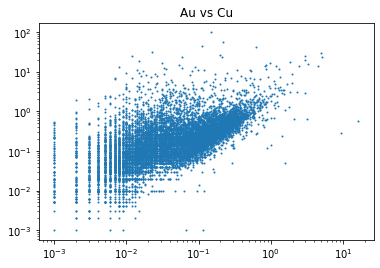

In [13]:
fig, ax = plt.subplots()

x = clean_assay.CU_PCT_OLDISKUT
y = clean_assay.AU_PPM_OLDISKUT


ax.scatter(x, y, s=1)
    
    
ax.set_title("Au vs Cu")
# ax.set_xlim(0.0001, 20)
ax.set_xscale("log")
# ax.set_ylim(0.001, 100)
ax.set_yscale("log")

fig.show()

In [14]:
len(old_lith.Lith_grouped.unique())

12

In [15]:
# First, get the data
assay = pd.read_csv(f'{DATA_FOLDER}BS_assay.csv')  # here is the assay data

In [16]:
# Then clean the data
clean_assay = assay[pd.to_numeric(assay['AU_PPM_OLDISKUT'], errors='coerce').notnull()]
clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)

# Hopefully all the things that we want to keep numerical are now numerical

# Remove negative grades
clean_assay = clean_assay[clean_assay['AU_PPM_OLDISKUT'] >= 0]

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_21661/910960147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)


In [17]:
survey_dhs = survey.HOLEID.unique()
collar_dhs = collar.HOLEID.unique()
assay_dhs = assay.HOLEID.unique()

# We blacklist all the data that do not have assay, collar, and survey entries
blacklist = []
for dh in survey_dhs:
    if dh not in collar_dhs:
        blacklist.append(dh)
        
for dh in assay_dhs:
    if dh not in collar_dhs:
        blacklist.append(dh)

clean_assay = clean_assay[~clean_assay['HOLEID'].isin(blacklist)]

In [18]:
assay = clean_assay

In [19]:
df = assay.describe().transpose()
df['range'] = df['max'] - df['min']
df.round(2)

,count,mean,std,min,25%,50%,75%,max,range
SAMPFROM,10497.0,156.14,124.37,0.00,59.50,125.00,222.00,693.00,693.00
SAMPTO,10497.0,158.43,124.39,0.46,61.70,127.00,224.60,696.00,695.54
AG_PPM_OLDISKUT,10323.0,10.57,533.85,0.00,0.70,1.50,3.43,54196.00,54196.00
AS_PPM_OLDISKUT,4037.0,307.65,1660.56,1.00,31.00,52.00,131.00,58800.00,58799.00
AU_PPM_OLDISKUT,10497.0,0.73,8.63,0.00,0.07,0.16,0.38,693.00,693.00
BA_PPM_OLDISKUT,2819.0,495.23,503.07,10.00,112.00,218.00,850.00,3720.00,3710.00
BI_PPM_OLDISKUT,4037.0,10.90,47.35,1.00,1.00,2.50,6.00,1516.00,1515.00
CD_PPM_OLDISKUT,4037.0,23.48,78.87,0.30,0.60,4.00,14.50,2000.00,1999.70
CO_PPM_OLDISKUT,4037.0,21.67,40.52,0.50,10.00,15.00,21.00,1070.00,1069.50
CR_PPM_OLDISKUT,4037.0,65.72,67.53,0.50,21.00,42.00,84.00,622.00,621.50


In [20]:
# Sort the data into drillholes
hole_ids = assay.HOLEID.unique()

resources = {
    "Cu": "CU_PCT_OLDISKUT",
    "Au": "AU_PPM_OLDISKUT",
    "Ag": "AG_PPM_OLDISKUT",
    "Mo": "MO_PCT_OLDISKUT"
}

# currently creating a dictionary with the DataFrame queries, but we can create an object instead
drillholes = {}
for hole_id in hole_ids:
    dh = drillholes[hole_id] = Grouping(hole_id)
    df = assay.query("HOLEID == @hole_id")
    weights = list(np.subtract(df.SAMPTO, df.SAMPFROM))
    
    for resource_id, column_id in resources.items():
        grades = list(df[column_id])
        print(f'{hole_id}/{resource_id}')
        dh.calculate_resource_heterogeneity(resource_id, weights, grades)
            

# Calculate constitutional heterogeneity, and distributional heterogeneity

1198/Cu
1198/Au
1198/Ag
1198/Mo
1199/Cu
1199/Au
1199/Ag
1199/Mo
1200/Cu
1200/Au
1200/Ag
1200/Mo
1201/Cu
1201/Au
1201/Ag
1201/Mo
1202/Cu
1202/Au
1202/Ag
1202/Mo
1217/Cu
1217/Au
1217/Ag
1217/Mo
1218/Cu
1218/Au
1218/Ag
1218/Mo
1203/Cu
1203/Au
1203/Ag
1203/Mo
1236/Cu
1236/Au
1236/Ag
1236/Mo
1239/Cu
1239/Au
1239/Ag
1239/Mo
1204/Cu
1204/Au
1204/Ag
1204/Mo
SK84-51/Cu
SK84-51/Au
SK84-51/Ag
SK84-51/Mo
1208/Cu
1208/Au
1208/Ag
1208/Mo
1209/Cu
1209/Au
1209/Ag
1209/Mo
1210/Cu
1210/Au
1210/Ag
1210/Mo
1211/Cu
1211/Au
1211/Ag
1211/Mo
SK10-01/Cu
SK10-01/Au
SK10-01/Ag
SK10-01/Mo
SK10-02/Cu
SK10-02/Au
SK10-02/Ag
SK10-02/Mo
SK10-03/Cu
SK10-03/Au
SK10-03/Ag
SK10-03/Mo
SK10-04/Cu
SK10-04/Au
SK10-04/Ag
SK10-04/Mo
SK10-06/Cu
SK10-06/Au
SK10-06/Ag
SK10-06/Mo
1212/Cu
1212/Au
1212/Ag
1212/Mo
SK10-05/Cu
SK10-05/Au
SK10-05/Ag
SK10-05/Mo
SK10-07/Cu
SK10-07/Au
SK10-07/Ag
SK10-07/Mo
SK10-08/Cu
SK10-08/Au
SK10-08/Ag
SK10-08/Mo
SK10-09/Cu
SK10-09/Au
SK10-09/Ag
SK10-09/Mo
1213/Cu
1213/Au
1213/Ag
1213/Mo
1214/Cu
1214/Au


Assay Cu CH: 2.12
Assay Au CH: 53.1
Assay Ag CH: 26.9
Assay Mo CH: 4.63


/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_21661/3626530838.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


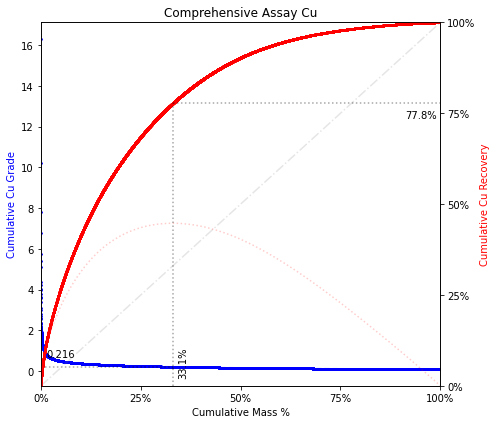

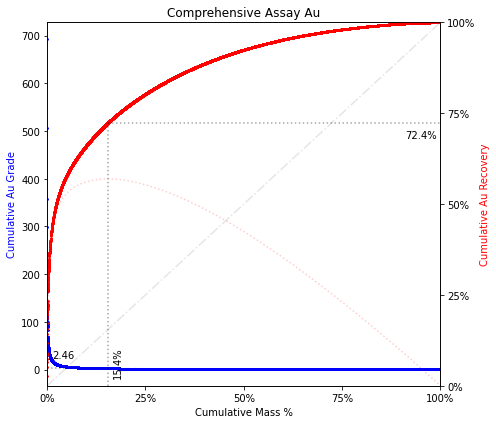

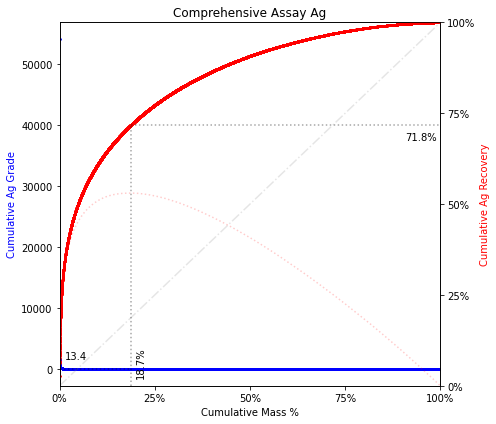

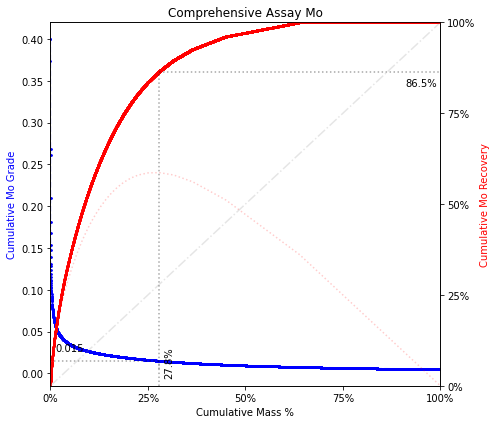

In [21]:
resources = {
    "Cu": "CU_PCT_OLDISKUT",
    "Au": "AU_PPM_OLDISKUT",
    "Ag": "AG_PPM_OLDISKUT",
    "Mo": "MO_PCT_OLDISKUT"
}

ca = Grouping('Comprehensive Assay')
df = clean_assay

for resource_id, column_id in resources.items():
    df_resource = df[df[column_id].notna()]
    weights = list(np.subtract(df_resource.SAMPTO, df_resource.SAMPFROM))
    grades = list(df_resource[column_id])
    
    ca.calculate_resource_heterogeneity(resource_id, weights, grades)
        
figs = ca.plot_grade_recovery_curves_separate()

# fig.tight_layout()
# fig.show()
# fig.savefig('deliverables/ca-gr-curve.png', dpi=300)

for resource_id, fig in figs.items():
    print(f'Assay {resource_id} CH: {ca.resources[resource_id].cons_het:.3}')
    
    fig.tight_layout()
    fig.show()
    # fig.savefig(f'deliverables/ca-gr-curve-{resource_id}.png', dpi=300)


In [22]:
import os

OUTPUT = "./output"

if not os.path.isdir(OUTPUT):
    os.mkdir(OUTPUT)

for resource_id in resources.keys():
    if not os.path.isdir(f"{OUTPUT}/{resource_id}"):
        os.mkdir(f"{OUTPUT}/{resource_id}")
    for dh_id, dh in drillholes.items():
        dh.resources[resource_id].info.to_csv(f"{OUTPUT}/{resource_id}/{dh_id}.csv")

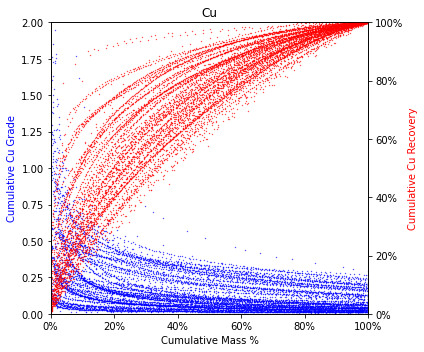

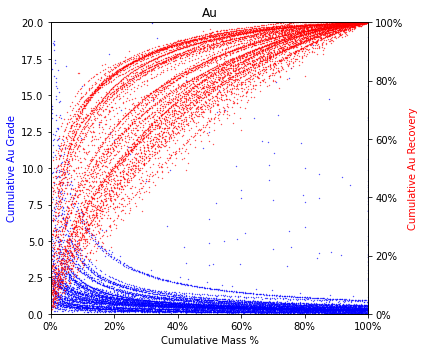

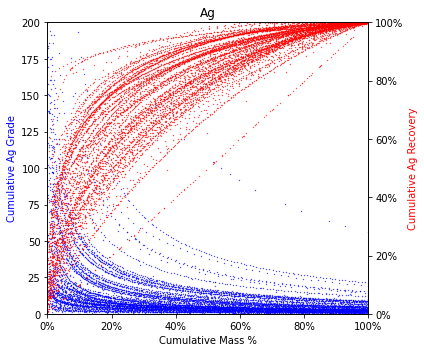

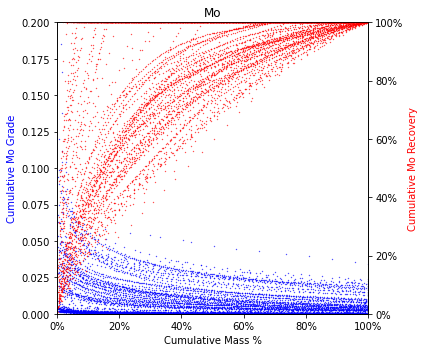

In [23]:
import matplotlib.ticker as mtick

# fig, axs = plt.subplots(len(resources), figsize=(6, 6 * len(resources)))

for i, resource_id in enumerate(resources.keys()):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax_sec = ax.twinx()
    
    ax.set_title(resource_id)
    
    for dh_id in drillholes.keys():
        if dh_id not in blacklist:
            df = drillholes[dh_id].resources[resource_id].info

            x = df['cml_weight_pct']
            y = df['cml_grade']
            ax.scatter(x, y, color='blue', s=0.1)
            
            y = df['cml_recovery']
            ax_sec.scatter(x, y, color='red', s=0.1)
    
    
    ax.set_ylabel(f"Cumulative {resource_id} Grade", c="blue") 
    if resource_id == "Cu":
        ax.set_ylim(0, 2)
        pass
    elif resource_id == "Au":
        ax.set_ylim(0, 20)
    elif resource_id == "Ag":
        ax.set_ylim(0, 200)
    elif resource_id == "Mo":
        ax.set_ylim(0, 0.2)
        
    ax.set_xlabel("Cumulative Mass %")
    ax.set_xlim(0, 1)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    ax_sec.set_ylabel(f"Cumulative {resource_id} Recovery", c="red") 
    ax_sec.set_ylim(0, 1)
    ax_sec.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    fig.tight_layout()
    # fig.savefig(f"deliverables/combined-gr-curve-{resource_id}.png", dpi=300)
    # fig.show()

In [24]:
# fig.savefig("charts.png")

In [25]:
# dh_id = '1198'

# fig = drillholes[dh_id].plot_grade_recovery_curves()

# fig.tight_layout()
# fig.savefig('sample.svg')

In [26]:
# DATA_FOLDER = 'data/'
# bm = pd.read_csv(f'{DATA_FOLDER}BS_block_model.csv')

# bm.rename(columns = {
#     'X': 'x', 
#     'Y': 'y',
#     'Z': 'z'
# }, inplace = True)

# bm_flat = {}
# for idx, row in bm.iterrows():
#     x, y, z = row.x, row.y, row.z
#     if (x, y) in bm_flat:
#         bm_flat[(x, y)] = min(bm_flat[(x, y)], z)
#     else:
#         bm_flat[(x, y)] = z
        
# keys = np.array(list(bm_flat.keys()), dtype=np.dtype('float, float'))
# x, y = keys['f0'], keys['f1']
# z = np.array(list(bm_flat.values()))

In [27]:
DATA_FOLDER = 'data/'
bm = pd.read_csv(f'{DATA_FOLDER}BS_block_model.csv')

bm.rename(columns = {
    'X': 'x', 
    'Y': 'y',
    'Z': 'z'
}, inplace = True)

x, y, z = bm.x, bm.y, bm.z

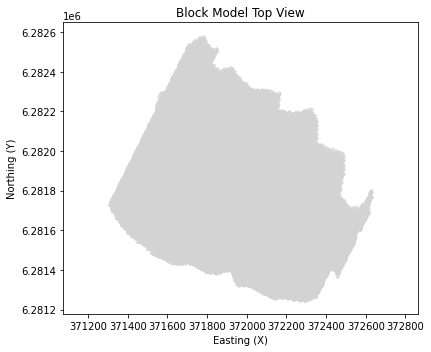

In [28]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.axis('equal')
ax.scatter(x, y, c='lightgrey', s=1)
ax.set_title("Block Model Top View")
ax.set_xlabel("Easting (X)")
ax.set_ylabel("Northing (Y)")
fig.tight_layout()
fig.savefig("deliverables/bm_z_view.png", dpi=300)

In [29]:
# # fig, ax = plt.subplots()
# fig, axs = plt.subplots(len(resources), figsize=(6, 6 * len(resources)))
# # cmaps = {
# #     'Cu': 'copper',
# #     'Au': 'autumn',
# #     'Ag': 'winter',
# #     'Mo': 'spring'
# # }

# for i, resource_id in enumerate(resources.keys()):
#     ax = axs[i]
    
#     ax.axis('equal')
#     ax.scatter(x, y, c=z, cmap='gist_earth', s=s)
#     ax.set_title("Block Model Z View")
#     ax.set_xlabel("X")
#     ax.set_ylabel("Y")
    
#     data = []
#     for index, row in collar.iterrows():
#         hole_id = row['HOLEID']
#         if hole_id in hole_ids:
#             data.append([row['EAST'], row['NORTH'], drillholes[hole_id].resources[resource_id].cons_het])
            
#     df = pd.DataFrame(data, columns=['x', 'y', 'cons_het'])
#     df = df.dropna(axis=0)
#     capped_cons_het = np.minimum(df.cons_het, 2)
#     ax.scatter(df.x, df.y, s=20, c=capped_cons_het, cmap='copper') 
    
#     ax.set_title(resource_id)
#     ax.set_xlabel("Easting")
#     ax.set_ylabel("Northing")
    
# fig.show()

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_21661/153232402.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


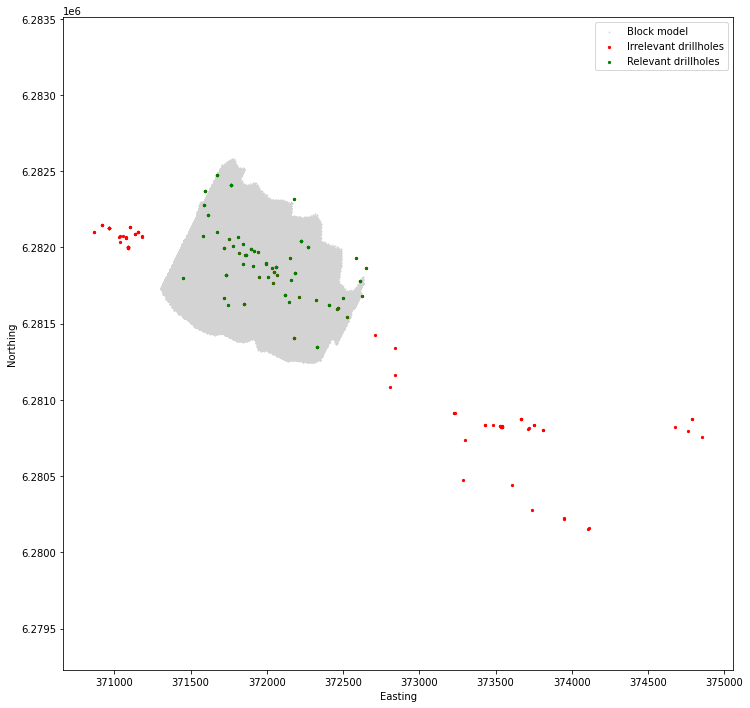

In [30]:
# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(12, 12))
    
ax.axis('equal')
ax.scatter(x, y, c='lightgray', s=0.5, label='Block model')
# ax.set_title("Block Model Z View")
ax.set_xlabel("X")
ax.set_ylabel("Y")

data = []
for index, row in collar.iterrows():
    if row['HOLEID'] in hole_ids:
        data.append([row['HOLEID'], row['EAST'], row['NORTH']])
        
df = pd.DataFrame(data, columns=['hole_id', 'x', 'y'])
df = df.dropna(axis=0)
ax.scatter(df.x, df.y, s=5, c='red', label='Irrelevant drillholes') 
df = df[(371300 < df['x']) & (df['x'] < 372700)]  # filter out drillholes far away
ax.scatter(df.x, df.y, s=5, c='green', label='Relevant drillholes') 

ax.set_xlabel("Easting")
ax.set_ylabel("Northing")
    
ax.legend()
fig.show()
# fig.savefig('deliverables/bm-dh-z-view.png', dpi=300)

whitelist = list(df['hole_id'])

In [31]:
# import matplotlib.ticker as mtick

# fig, axs = plt.subplots(len(resources), figsize=(6, 6 * len(resources)))

# for i, resource_id in enumerate(resources.keys()):
#     ax = axs[i]
#     ax_sec = ax.twinx()
    
#     ax.set_title(resource_id)
    
#     for dh_id in drillholes.keys():
#         if dh_id not in blacklist and dh_id in whitelist:
#             df = drillholes[dh_id].resources[resource_id].info

#             x = df['cml_weight_pct']
#             y = df['cml_grade']
#             ax.scatter(x, y, color='blue', s=0.1)
            
#             y = df['cml_recovery']
#             ax_sec.scatter(x, y, color='red', s=0.1)
    
    
#     ax.set_ylabel(f"Cumulative {resource_id} Grade", c="blue") 
#     if resource_id == "Cu":
#         ax.set_ylim(0, 2)
#         pass
#     elif resource_id == "Au":
#         ax.set_ylim(0, 20)
#     elif resource_id == "Ag":
#         ax.set_ylim(0, 200)
#     elif resource_id == "Mo":
#         ax.set_ylim(0, 0.1)
        
#     ax.set_xlabel("Cumulative Mass %")
#     ax.set_xlim(0, 1)
#     ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
#     ax_sec.set_ylabel(f"Cumulative {resource_id} Recovery", c="red") 
#     ax_sec.set_ylim(0, 1)
#     ax_sec.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# fig.show()

1198/Au: 0.19624217613250938
1199/Au: 0.3539190164095726
1200/Au: 0.7251112965058248
1201/Au: 0.6979595079780234
1202/Au: 0.20171979131538206
1217/Au: 1.2548974054603077
1218/Au: 0.8595693999007327
1203/Au: 0.6327574229919232
1236/Au: 2.22085987672106
1239/Au: 0.2539075656495931
1204/Au: 1.480169513512432
1208/Au: 1.0612379573586852
1209/Au: 0.8986598992519712
1210/Au: 0.531679100046146
1211/Au: 1.2551672121959068
1212/Au: 0.5855634605927809
1215/Au: 1.26644455630518
1216/Au: 1.277605266479837
1222/Au: 0.526916600614606
1219/Au: 0.6330220013277544
1221/Au: 1.0903448459308795
1220/Au: 0.566164526293956
1223/Au: 2.5598425870258605
1231/Au: 0.16836573526364523
1245/Au: 2.126647354985403
1233/Au: 0.4932866314181709
945/Au: 0.18343613805976222
946/Au: 0.8394373625217889
947/Au: 0.2696903765782516
948/Au: 0.6970394918599663
949/Au: 0.2761208539325402
954/Au: 0.5468303429538568
955/Au: 1.1168119299550652
956/Au: 0.642637226520159
957/Au: 0.817729546919378
958/Au: 0.4279265611594901
959/Au: 0.

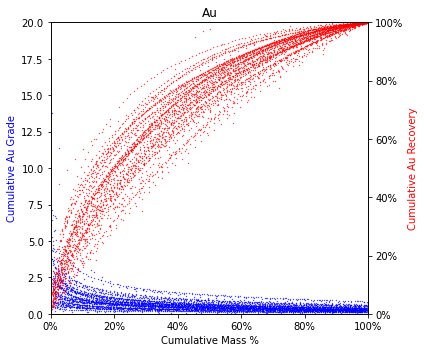

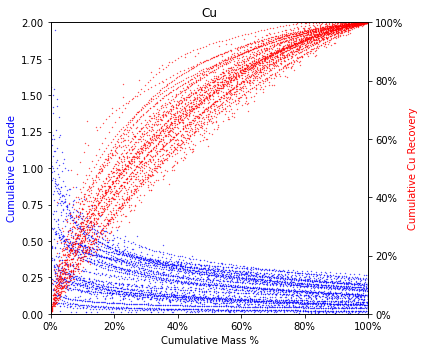

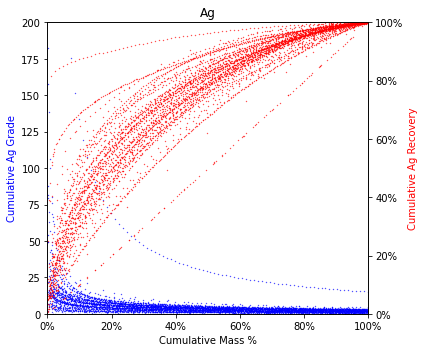

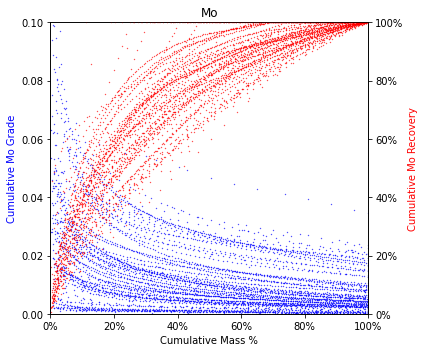

In [38]:
import matplotlib.ticker as mtick

filtered_ch = {}

for i, resource_id in enumerate(resources.keys()):
    resource_ch = []
    fig, ax = plt.subplots(figsize=(6, 5))
    ax_sec = ax.twinx()
    
    ax.set_title(resource_id)
    for dh_id in drillholes.keys():
        if dh_id not in blacklist and dh_id in whitelist:
            df = drillholes[dh_id].resources[resource_id].info
            
            ch_val = drillholes[dh_id].resources[resource_id].cons_het
            print(f"{dh_id}/{resource_id}: {ch_val}")
            resource_ch.append(ch_val)

            x = df['cml_weight_pct']
            y = df['cml_grade']
            ax.scatter(x, y, color='blue', s=0.1)
            
            y = df['cml_recovery']
            ax_sec.scatter(x, y, color='red', s=0.1)
            
    filtered_ch[resource_id] = resource_ch
    
    ax.set_ylabel(f"Cumulative {resource_id} Grade", c="blue") 
    if resource_id == "Cu":
        ax.set_ylim(0, 2)
    elif resource_id == "Au":
        ax.set_ylim(0, 20)
    elif resource_id == "Ag":
        ax.set_ylim(0, 200)
    elif resource_id == "Mo":
        ax.set_ylim(0, 0.1)
        
    ax.set_xlabel("Cumulative Mass %")
    ax.set_xlim(0, 1)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    ax_sec.set_ylabel(f"Cumulative {resource_id} Recovery", c="red") 
    ax_sec.set_ylim(0, 1)
    ax_sec.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    fig.tight_layout()
    # fig.show()
    fig.savefig(f'deliverables/idh-filtered-gr-curve-{resource_id}.png', dpi=300)

In [42]:
# Analyse the whitelisted DH CH values
filtered_df = pd.DataFrame.from_dict(filtered_ch, orient='columns')
df = filtered_df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).transpose()
df['range'] = df['max'] - df['min']
df.round(2)

,count,mean,std,min,5%,25%,50%,75%,95%,max,range
Au,81.0,0.90,0.97,0.03,0.16,0.40,0.70,1.09,2.22,7.73,7.70
Cu,81.0,0.71,0.72,0.04,0.09,0.25,0.53,0.76,2.40,3.83,3.79
Ag,81.0,2.21,6.02,0.00,0.00,0.66,1.14,2.04,3.60,53.23,53.23
Mo,78.0,1.69,2.11,0.12,0.21,0.53,1.10,2.04,5.44,15.12,15.00


Assay Cu CH: 1.13
Assay Au CH: 1.57
Assay Ag CH: 42.9
Assay Mo CH: 2.59


/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_21661/2450524405.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


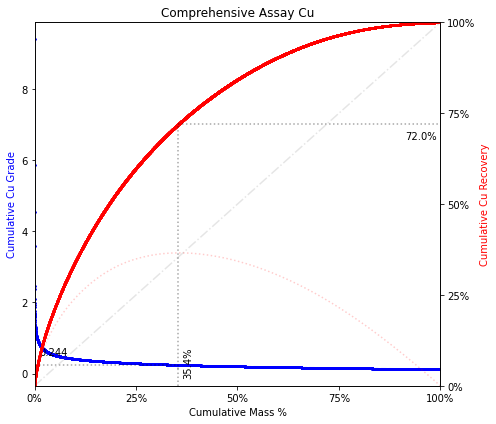

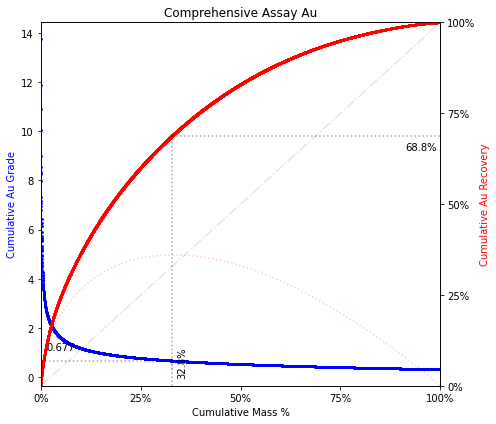

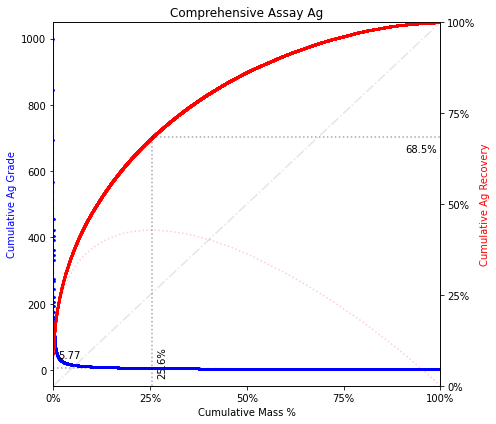

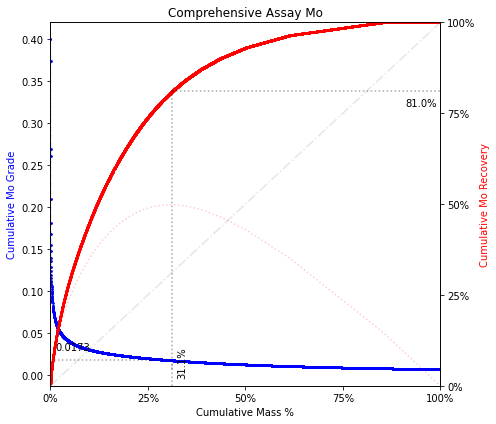

In [34]:
# Calculate the CA with only whitelisted data.
resources = {
    "Cu": "CU_PCT_OLDISKUT",
    "Au": "AU_PPM_OLDISKUT",
    "Ag": "AG_PPM_OLDISKUT",
    "Mo": "MO_PCT_OLDISKUT"
}

ca = Grouping('Comprehensive Assay')
df = clean_assay[clean_assay["HOLEID"].isin(whitelist)]

for resource_id, column_id in resources.items():
    df_resource = df[df[column_id].notna()]
    weights = list(np.subtract(df_resource.SAMPTO, df_resource.SAMPFROM))
    grades = list(df_resource[column_id])
    
    ca.calculate_resource_heterogeneity(resource_id, weights, grades)
        
figs = ca.plot_grade_recovery_curves_separate()

# fig.tight_layout()
# fig.show()
# fig.savefig('deliverables/ca-gr-curve.png', dpi=300)

for resource_id, fig in figs.items():
    print(f'Assay {resource_id} CH: {ca.resources[resource_id].cons_het:.3}')
    
    fig.tight_layout()
    fig.show()
    # fig.savefig(f'deliverables/ca-filtered-gr-curve-{resource_id}.png', dpi=300)

In [35]:
filtered_df = clean_assay[clean_assay["HOLEID"].isin(whitelist)]
df = filtered_df.describe().transpose()
df['range'] = df['max'] - df['min']
df.round(2)

,count,mean,std,min,25%,50%,75%,max,range
SAMPFROM,5483.0,152.09,113.39,0.00,59.00,125.00,225.15,542.30,542.30
SAMPTO,5483.0,155.02,113.37,0.46,62.00,128.00,228.15,545.70,545.24
AG_PPM_OLDISKUT,5483.0,2.39,14.49,0.01,0.60,1.20,2.30,999.00,998.99
AS_PPM_OLDISKUT,467.0,61.97,255.21,1.00,45.50,50.00,50.00,4747.00,4746.00
AU_PPM_OLDISKUT,5483.0,0.35,0.51,0.00,0.10,0.22,0.42,13.75,13.75
BA_PPM_OLDISKUT,467.0,100.65,47.26,20.00,66.00,93.00,125.50,301.00,281.00
BI_PPM_OLDISKUT,467.0,13.71,19.76,1.50,1.50,3.00,11.00,50.00,48.50
CD_PPM_OLDISKUT,467.0,3.61,7.12,0.30,0.70,1.70,5.00,100.20,99.90
CO_PPM_OLDISKUT,467.0,20.33,17.12,5.00,10.00,20.00,23.50,226.00,221.00
CR_PPM_OLDISKUT,467.0,41.28,59.91,0.50,8.00,20.00,50.00,557.00,556.50


In [36]:
# input = {
#     filter: "HOLEID == @hole_id" | None,
#     cols_for_het_anal: [ "1", "2", "3" ], # Non-empty
#     weights_config: {
#         assume_equal_weights: true | false,
#         weights_col: "@after - @before", # required iff assume_equal_weights is false
#     }
# }
block_model['weights'] = 1
    
resources = {
    "Au": "AU",
    "Cu": "CU",
    "Ag": "AG",
    "Mo": "MO"
}

bm = Grouping('Block Model')
df = block_model
weights = df['weights']

for resource_id, column_id in resources.items():
    grades = df[column_id].to_list()
    bm.calculate_resource_heterogeneity(resource_id, df['weights'], grades)

Block Model Au CH: 0.352


/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_21661/3950052508.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Block Model Cu CH: 0.664
Block Model Ag CH: 0.337
Block Model Mo CH: 1.0


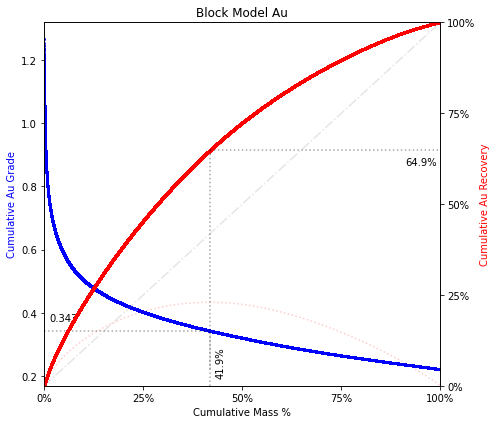

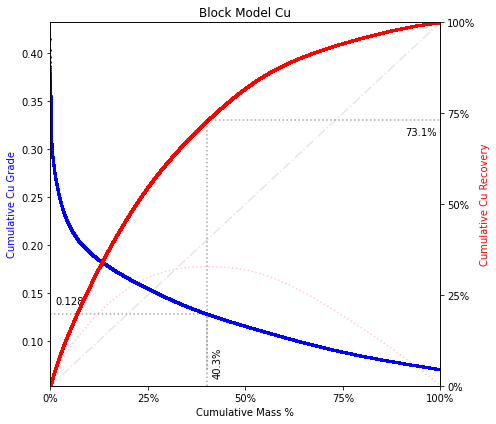

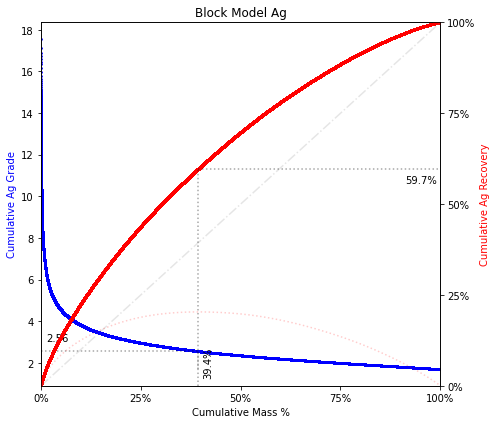

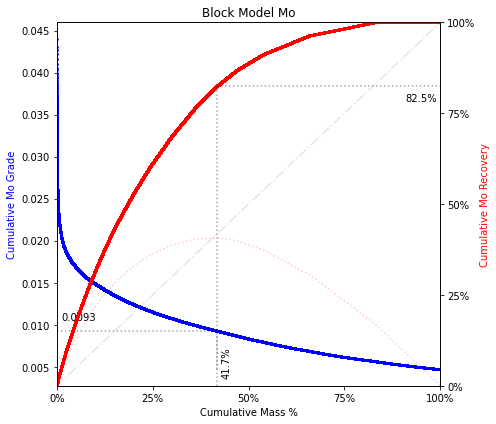

In [37]:
figs = bm.plot_grade_recovery_curves_separate()

# fig.tight_layout()
# fig.show()
# fig.savefig('deliverables/bm-gr-curve.png', dpi=300)

for resource_id, fig in figs.items():
    print(f'Block Model {resource_id} CH: {bm.resources[resource_id].cons_het:.3}')
    
    fig.tight_layout()
    fig.show()
    fig.savefig(f'deliverables/bm-gr-curve-{resource_id}.png', dpi=300)
